In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [10]:
class HingeLossPerceptron(tf.keras.Model):
  def __init__(self, input_dim, output_dim):
    super(HingeLossPerceptron, self).__init__()
    self.w = tf.Variable(tf.random.normal((input_dim, output_dim)))
    self.b = tf.Variable(tf.zeros((output_dim,)))
    self.t = tf.Variable(1.0)  # Learnable thresholds

  def call(self, x):
    # Apply linear transformation
    z = tf.matmul(x, self.w) + self.b
    # Apply hinge loss
    return (tf.math.sign(tf.abs(z) - self.t) + 1)/2

# Define model with input dimension (32 for your case) and output dimension (binary classification assumed)
model = HingeLossPerceptron(32, 1)


In [2]:
train_data = np.loadtxt("train.dat", delimiter=" ")
trainX, trainY = train_data.transpose()[:-1].transpose(), train_data.transpose()[-1].transpose()
trainX = 1-2*trainX
trainX = np.cumprod(trainX[:, ::-1], axis=1)[:, ::-1]

In [12]:
def sign_hinge_loss(y_true, y_pred):
  # Calculate absolute value and subtract threshold
  margin = tf.abs(y_pred) - 1.0
  # Apply sign function and calculate hinge loss
  return tf.reduce_mean(tf.maximum(0.0, 1.0 - y_true * tf.math.sign(margin)))


In [13]:
# Compile the model
model.compile(loss=sign_hinge_loss, optimizer='adam', metrics=[sign_hinge_loss])


# Train the model
model.fit(trainX, trainY, validation_batch_size=0.2, epochs=10, batch_size=32)


Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 2/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 7/10
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 8/10
1250/1250 [==============================] - 3s 3ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 9/10
1250/1250 [==============================] - 2s 2ms/step - loss: 1.0744 - sign_hinge_loss: 1.0744
Epoch 10/10
1250/12

In [18]:
model.b

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(1, activation='relu', input_shape=(32,))
    # Dense(1, activation='sigmoid')  # Output layer with sigmoid activation
])

# Step 3: Split Data

X_train, X_val, Y_train, Y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

# Step 4: Train Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

# Step 5: Evaluate Model

loss, accuracy = model.evaluate(X_val, Y_val)
print("Test Accuracy:", accuracy)

# You can also make predictions using the trained model
predictions = model.predict(X_val)


Epoch 1/10
1000/1000 [==============================] - 7s 5ms/step - loss: 0.4653 - accuracy: 0.7948 - val_loss: 0.2038 - val_accuracy: 0.9588
Epoch 2/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1426 - accuracy: 0.9716 - val_loss: 0.1090 - val_accuracy: 0.9756
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0903 - accuracy: 0.9806 - val_loss: 0.0818 - val_accuracy: 0.9775
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.0694 - accuracy: 0.9834 - val_loss: 0.0679 - val_accuracy: 0.9801
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0578 - accuracy: 0.9854 - val_loss: 0.0586 - val_accuracy: 0.9805
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0501 - accuracy: 0.9867 - val_loss: 0.0547 - val_accuracy: 0.9808
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0443 - accuracy: 0.9887 - val_loss: 0.0489 - val_accuracy:

In [3]:
test_data = np.loadtxt("test.dat", delimiter=" ")
testX, testY = test_data.transpose()[:-1].transpose(), test_data.transpose()[-1].transpose()
testX = 1-2*testX
testX = np.cumprod(testX[:, ::-1], axis=1)[:, ::-1]

In [36]:
testX.shape, testY.shape

((10000, 32), (10000,))

In [37]:

loss, accuracy = model.evaluate(testX, testY)
print("Test Accuracy:", accuracy)

# You can also make predictions using the trained model
predictions = model.predict(testX)

313/313 [==============================] - 1s 2ms/step - loss: 0.0424 - accuracy: 0.9848
Test Accuracy: 0.9847999811172485
313/313 [==============================] - 1s 2ms/step


In [38]:
predictions

array([[9.9725968e-01],
       [8.1889523e-04],
       [9.7729259e-14],
       ...,
       [1.0791683e-08],
       [2.8741183e-06],
       [9.9999756e-01]], dtype=float32)

In [6]:
X = np.linspace(-10, 10, 100)


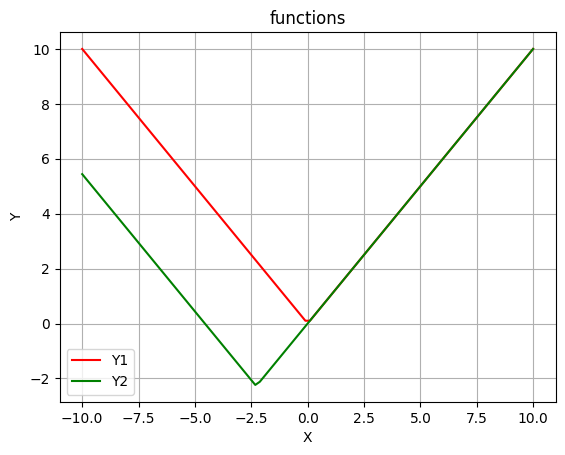

In [11]:
Y1 = (np.abs(X) )
Y2 = np.abs(X + 2.28) - 2.28
plt.plot(X, Y1, color='r', label='Y1') 
plt.plot(X, Y2, color='g', label='Y2') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("X") 
plt.ylabel("Y") 
plt.title("functions") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
plt.grid()
  
# To load the display window 
plt.show() 

In [12]:
import sklearn